In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import pydicom as dcm
import matplotlib.pyplot as plt
import os
import glob

In [4]:
img_path = r"C:\Users\rutvik\Documents\RSNA Brain Tumor Dataset\train\00000\FLAIR\Image-101.dcm"

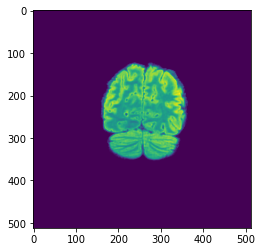

In [5]:
ds = dcm.read_file(img_path)
plt.imshow(ds.pixel_array)
plt.show()

In [6]:
ds.pixel_array.shape

(512, 512)

In [7]:
refD = dcm.read_file(img_path)
ConsPixelDims = (int(refD.Rows), int(refD.Columns), int(len(refD)))
ConsPixelSpacings = (float(refD.PixelSpacing[0]), float(refD.PixelSpacing[1]), float(refD.SliceThickness))

In [8]:
refD.SliceThickness

'1.2'

In [9]:
x = np.arange(0.0, (ConsPixelDims[0]+1)*ConsPixelSpacings[0], ConsPixelSpacings[0])
y = np.arange(0.0, (ConsPixelDims[1]+1)*ConsPixelSpacings[1], ConsPixelSpacings[1])
z = np.arange(0.0, (ConsPixelDims[2]+1)*ConsPixelSpacings[2], ConsPixelSpacings[2])

In [10]:
ArrayZeros = np.zeros(ConsPixelDims, dtype=refD.pixel_array.dtype)
ArrayZeros[:, :, 0] = ds.pixel_array
ArrayZeros.shape

(512, 512, 55)

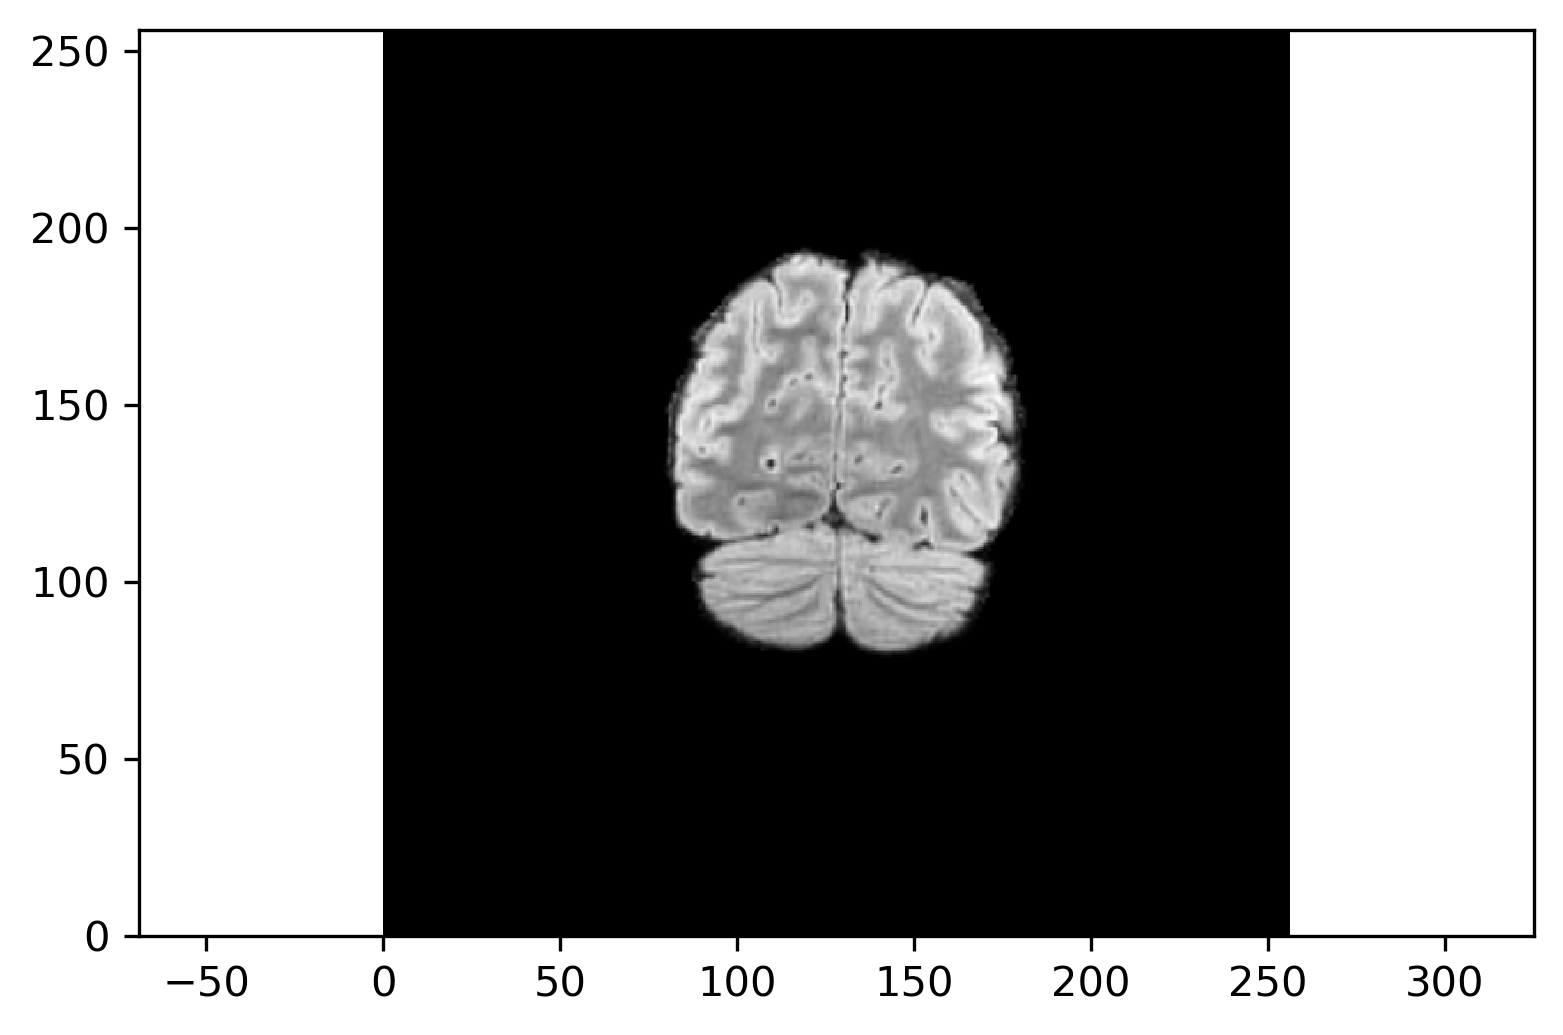

In [11]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(ArrayZeros[:, :, 0]))

In [12]:
pwd

'C:\\Users\\rutvik'

In [13]:
cd C:\\Users\\rutvik\\Documents\\RSNA Brain Tumor Dataset\\

C:\Users\rutvik\Documents\RSNA Brain Tumor Dataset


In [14]:
pwd

'C:\\Users\\rutvik\\Documents\\RSNA Brain Tumor Dataset'

In [15]:
#path = r"C:\Users\rutvik\Documents\RSNA Brain Tumor Dataset\train\00000\FLAIR\*.dcm"
#SIZE = 512
#train_data = []
#files = glob.glob(path)
#print(files)
#for file in files:
    #image = dcm.dcmread(file)
    #train_data.append(image.pixel_array)
#train_data = np.asarray(train_data)

In [16]:
#plt.imshow(train_data[101])

In [17]:
#count = 0
#for i in train_data:
    #if i.shape != (SIZE,SIZE):
        #count += 1
#count

In [18]:
path_2 = r"C:\Users\rutvik\Documents\RSNA Brain Tumor Dataset\train\00000"
print(os.listdir(path_2))

['FLAIR', 'T1w', 'T1wCE', 'T2w']


In [19]:
cd C:\Users\rutvik\Documents\RSNA Brain Tumor Dataset\train\

C:\Users\rutvik\Documents\RSNA Brain Tumor Dataset\train


In [20]:
#new_train = []
#for root, dirs, file in os.walk("."):
    #for name in dirs:
        #print(os.path.join(root, name))
    #for f in file:
     #   filos = os.path.join(root, f)
     #   dcm_img = dcm.dcmread(filos)
     #   img = dcm_img.pixel_array
     #   new_train.append(img)
#np.asarray(new_train)

In [21]:
#train_data.shape

In [22]:
labels_path = r"C:\Users\rutvik\Documents\RSNA Brain Tumor Dataset\train_labels.csv"
train_df = pd.read_csv(labels_path)

In [23]:
train_df.head()

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1


In [24]:
mri_imgs = ["FLAIR", "T1w", "T1wCE", "T2w"]
error_imgs = [109, 123, 709]

In [25]:
test_df = pd.read_csv(r"C:\Users\rutvik\Documents\RSNA Brain Tumor Dataset\sample_submission.csv")
test_df.head()

,BraTS21ID,MGMT_value
0,1,0.5
1,13,0.5
2,15,0.5
3,27,0.5
4,37,0.5


In [26]:
train_df = train_df[~train_df.BraTS21ID.isin(error_imgs)]
train_df

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1
...,...,...
580,1005,1
581,1007,1
582,1008,1
583,1009,0


In [27]:
np.random.seed(42)

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [29]:
def generate_folds_val(data, num_splits):
    data["k_folds"] = -1
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
    for f, (t, v) in enumerate(kf.split(X=data)):
        data.loc[v, "k_folds"] = f
    return data

In [30]:
k = 5
#df = generate_folds_val(df, num_splits=k)
train_df

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1
...,...,...
580,1005,1
581,1007,1
582,1008,1
583,1009,0


In [31]:
def convert_braTS21ID_tostring(train_df):
    ID = []
    for i in train_df["BraTS21ID"]:
        ID.append(str(i).zfill(5))
    train_df["BraTS21ID"] = ID
    return df.head()

In [32]:
#convert_braTS21ID_tostring(train_df)

In [33]:
train_df.iloc[71]

BraTS21ID     110
MGMT_value      0
Name: 72, dtype: int64

In [34]:
train_df.iloc[488]

BraTS21ID     716
MGMT_value      1
Name: 491, dtype: int64

In [35]:
train_df.iloc[81]

BraTS21ID     128
MGMT_value      1
Name: 83, dtype: int64

In [36]:
drop_em = [71, 81, 488]
#df.drop(labels=drop_em, axis=0)

In [37]:
MGMT_1 = train_df.loc[train_df.MGMT_value == 1]
MGMT_0 = train_df.loc[train_df.MGMT_value == 0]

In [38]:
print(len(MGMT_1))
print(len(MGMT_0))

306
276


In [39]:
from scipy import ndimage
from pydicom.pixel_data_handlers.util import apply_voi_lut
import re

In [40]:
SIZE = 256
def load_dicom_image(path, img_size=SIZE):
    dcm_img = dcm.read_file(path)
    img = dcm_img.pixel_array
    if np.max(img) != 0:
        img = img /np.max(img)
    img = (img * 255).astype(np.uint8)
    img = cv2.resize(img, (img_size, img_size))
    return img

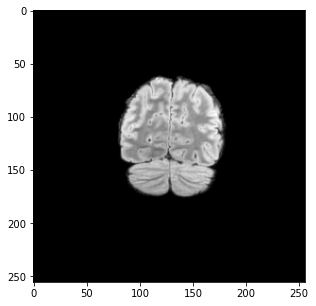

In [41]:
plt.figure(figsize=(5,5))
plt.imshow(load_dicom_image(img_path, SIZE))

In [42]:
print(load_dicom_image(img_path, SIZE))
print()
print(load_dicom_image(img_path, SIZE).shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

(256, 256)


In [43]:
#print(load_dicom_image(img_path, SIZE, True))
#print()
#print(load_dicom_image(img_path, SIZE, True).shape)

In [44]:
dcm_path = r"C:/Users/rutvik/Documents/RSNA Brain Tumor Dataset"
#n_images = 64
def image_paths(scan_id, split="train", mri_type="T1wCE"):
    
    patient_path = os.path.join(
        r"C:/Users/rutvik/Documents/RSNA Brain Tumor Dataset/%s/" % split, 
        str(scan_id).zfill(5))

    files = sorted(
        glob.glob(os.path.join(patient_path, mri_type, "*")), 
        key=lambda x: int(x[:-4].split("-")[-1])
    )
    
    #files = sorted(glob.glob(f'{dcm_path}/{split}/{scan_id}/{mri_type}/*.dcm'), 
                  #key=lambda var: int(x[:-4].split("-")[-1]))
    
    start = int(len(files) * 0.25)
    end = int(len(files) * 0.75)
    interval = 3
    
    if len(files) < 10:
        interval = 1
    paths_img = np.array(files[start:end:interval])
    
    return paths_img

def load_all_imgs_array(scan_id, split="train", mri_type="T1wCE", size=SIZE):
    return [load_dicom_image(path, size) for path in image_paths(scan_id=scan_id, split=split, mri_type=mri_type)]

In [45]:
#image_3D_1 = np.expand_dims(load_dcm_image_3D("00000"), 0)
#image_3D_indi = load_dcm_image_3D("00000")
#print(image_3D_indi.shape)
#a = image_3D_1[0]
#print(np.min(image_3D_1), np.max(image_3D_1))

#plt.figure(figsize=(8,8))
#plt.subplot(121)
#plt.imshow(np.squeeze(a[:, :, 31]), cmap='gray')
#plt.title("Image #32")
#plt.subplot(122)
#plt.imshow(np.squeeze(a[:, :, 0]), cmap='gray')
#plt.title("Image #1")

def load_onto_train(mri_type, img_size=32):
    global train_df
    X = []
    y = []
    train_ids = []
    
    for i in train_df.index:
        x = train_df.loc[i]
        images = load_all_imgs_array(int(x["BraTS21ID"]), split="train", mri_type=mri_type, size=img_size)
        label = x["MGMT_value"]
        
        X += images
        y += [label] * len(images)
        train_ids += [int(x["BraTS21ID"])] * len(images)
        assert(len(X) == len(y))
    return np.array(X), np.array(y), np.array(train_ids)
    
def load_onto_test(mri_type, img_size=32):
    global test_df
    
    X = []
    test_ids = []

    for i in test_df.index:
        x = test_df.loc[i]
        images = load_all_imgs_array(int(x['BraTS21ID']), split="test", mri_type=mri_type, size=img_size)
        
        X += images
        test_ids += [int(x['BraTS21ID'])] * len(images)

    return np.array(X), np.array(test_ids)

In [46]:
# def normalize_volume(volume):
#     vol_min = np.min(volume)
#     vol_max = np.max(volume)
#     volume[volume<vol_min] = vol_min
#     volume[volume>vol_max] = vol_max
#     volume = (volume - vol_min) / (vol_max - vol_min)
#     volume = volume.astype("float32")
#     return volume

# def resize_image_volume(img):
#     desired_depth = 64
#     desired_height = 64
#     desired_width = 64
    
#     current_depth = img.shape[-1]
#     current_height = img.shape[1]
#     current_width = img.shape[0]
    
#     depth = current_depth/desired_depth
#     height = current_height/desired_height
#     width = current_width/desired_width
    
#     depth_factor = 1/depth
#     height_factor = 1/height
#     width_factor = 1/width
    
#     img = ndimage.rotate(img, 90, reshape=False)
#     img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
#     return img

# def cropping_img(img):
#     img_min = np.array(np.nonzero(img)).min(axis=1)
#     img_max = np.array(np.nonzero(img)).max(axis=1)
#     return img[img_min[0]:img_max[0], img_min[1]:img_max[1], img_min[2]:img_max[2]]

# def call_em_all(path):
#     vol = load_dcm_image_3D(path)
#     vol = normalize_volume(vol)
#     vol = cropping_img(vol)
#     vol = resize_image_volume(vol)
#     return vol

In [47]:
#plt.imshow(call_em_all("00000")[:, :, 0], cmap='gray')

In [48]:
#print(call_em_all("00000").shape)
#print(call_em_all("00000")[:, :, 0].shape)

In [49]:
#plt.imshow(np.squeeze(call_em_all("00000")[:, :, 0]), cmap='gray')

In [50]:
# MGMT_scan = np.array([call_em_all(x) for x in MGMT_1["BraTS21ID"][:40]])
# no_MGMT_scan = np.array([call_em_all(x) for x in MGMT_0["BraTS21ID"][:40]])

# MGMT_labels = np.array([1 for i in range(0, len(MGMT_1["BraTS21ID"][:40]))])
# no_MGMT_labels = np.array([0 for i in range(0, len(MGMT_0["BraTS21ID"][:40]))])

In [51]:
# x_train = np.concatenate((MGMT_scan[:28], no_MGMT_scan[:28]), axis=0)
# y_train = np.concatenate((MGMT_labels[:28], no_MGMT_labels[:28]), axis=0)
# x_val = np.concatenate((MGMT_scan[28:], no_MGMT_scan[28:]), axis=0)
# y_val = np.concatenate((MGMT_labels[28:], no_MGMT_labels[28:]), axis=0)

In [52]:
X, y, trainidt = load_onto_train('T1wCE', img_size=32)
X_test, testidt = load_onto_test('T1wCE', img_size=32)

In [53]:
X.shape, y.shape, trainidt.shape

((16196, 32, 32), (16196,), (16196,))

In [54]:
np.random.seed(42)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val, train_ids, val_ids = train_test_split(X, y, trainidt, test_size=0.2, random_state=42)

In [56]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((12956, 32, 32), (3240, 32, 32), (12956,), (3240,))

In [57]:
#x_train.shape

In [58]:
#x_val.shape

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, Input, Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from tensorflow.keras.regularizers import l2
import keras_tuner as kt

In [60]:
X_train = np.expand_dims(X_train, -1)
X_val = np.expand_dims(X_val, -1)

In [61]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(12956, 32, 32, 1)
(12956, 2)
(3240, 32, 32, 1)
(3240, 2)


In [63]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [64]:
X_train = X_train.astype("float32")
X_val = X_val.astype("float32")

In [65]:
X_train = X_train/255
X_val = X_val/255

In [66]:
X_train.max(), X_val.max()

(0.99215686, 0.99607843)

In [67]:
X_train.min(), X_val.min()

(0.0, 0.0)

In [68]:
width = 32
height = 32
color = 1
n_epochs = 40
eta = 0.001
train_shape = (width, height, color)
n_classes = 2

In [69]:
np.random.seed(42)
tf.random.set_seed(42)

In [225]:
model_1 = Sequential()
#model_1.add(Rescaling(scale=1./255))
model_1.add(Conv2D(filters=104, kernel_size=4,strides=2, activation="relu", kernel_regularizer=l2(0.02), input_shape=train_shape))
model_1.add(MaxPool2D(pool_size=2))
#model_1.add(BatchNormalization())

model_1.add(Conv2D(filters=96, kernel_size=2, activation="relu"))
model_1.add(MaxPool2D(pool_size=1))
#model_1.add(BatchNormalization())

#model_1.add(Conv3D(filters=128, kernel_size=3, activation="relu", kernel_initializer="glorot_uniform", padding="same"))
#model_1.add(MaxPooling3D(pool_size=2))
#model_1.add(BatchNormalization())

#model_1.add(Conv2D(filters=90, kernel_size=2, activation="relu"))
#model_1.add(MaxPool2D(pool_size=1))

model_1.add(Conv2D(filters=128, kernel_size=2, activation="relu"))
model_1.add(MaxPool2D(pool_size=1))
#model_1.add(BatchNormalization())

model_1.add(Dropout(0.5))

model_1.add(Flatten())
model_1.add(Dense(units=96, activation="relu"))
model_1.add(Dense(units=96, activation="relu"))

model_1.add(Dense(units=n_classes, activation="softmax"))

In [226]:
roc_auc = AUC(name="roc_auc", curve="ROC")
#lr_schedule = ExponentialDecay(eta, decay_steps=100000, decay_rate=0.96, staircase=True)

model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[roc_auc])
model_1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 15, 15, 104)       1768      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 104)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 6, 6, 96)          40032     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 96)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 5, 5, 128)         49280     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 128)       

In [227]:
es = EarlyStopping(monitor="val_roc_auc", mode='max', patience=3)
hist_1 = model_1.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/40
405/405 [==============================] - 8s 17ms/step - loss: 0.6911 - roc_auc: 0.5663 - val_loss: 0.6796 - val_roc_auc: 0.5968
Epoch 2/40
405/405 [==============================] - 6s 14ms/step - loss: 0.6821 - roc_auc: 0.5891 - val_loss: 0.6798 - val_roc_auc: 0.5975
Epoch 3/40
405/405 [==============================] - 6s 15ms/step - loss: 0.6805 - roc_auc: 0.5939 - val_loss: 0.6785 - val_roc_auc: 0.6041
Epoch 4/40
405/405 [==============================] - 6s 15ms/step - loss: 0.6792 - roc_auc: 0.5985 - val_loss: 0.6771 - val_roc_auc: 0.6080
Epoch 5/40
405/405 [==============================] - 6s 15ms/step - loss: 0.6777 - roc_auc: 0.6023 - val_loss: 0.6815 - val_roc_auc: 0.5953
Epoch 6/40
405/405 [==============================] - 6s 15ms/step - loss: 0.6775 - roc_auc: 0.6040 - val_loss: 0.6775 - val_roc_auc: 0.6060
Epoch 7/40
405/405 [==============================] - 6s 14ms/step - loss: 0.6748 - roc_auc: 0.6126 - val_loss: 0.6745 - val_roc_auc: 0.6154
Epoch 8/40
40

In [228]:
def convert_BraTS_to_int(train_df):
    p_id = []
    for i in train_df.BraTS21ID:
        i = i.astype("int64")
        p_id.append(i)
    train_df["BraTS21ID"] = p_id

In [229]:
y_pred = model_1.predict(X_val)

predictions = np.argmax(y_pred, axis=1)

result = pd.DataFrame(val_ids)
result[1] = predictions

result.columns = ["BraTS21ID", "MGMT_value"]
result2 = result.groupby("BraTS21ID", as_index=False).mean()
#train_df.BraTS21ID = pd.to_numeric(train_df.BraTS21ID)

result2 = result.merge(train_df, on="BraTS21ID")
auc = roc_auc_score(result2.MGMT_value_y, result2.MGMT_value_x)
print(f"Validation AUC={auc}")
#result2.MGMT_value_y, result2.MGMT_value_x

Validation AUC=0.7443797950750966


In [74]:
any(predictions != result.MGMT_value)

False

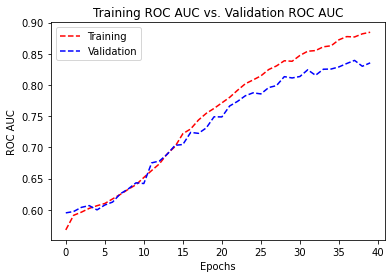

In [75]:
plt.plot(hist_1.history['roc_auc'], 'r--')
plt.plot(hist_1.history['val_roc_auc'], 'b--')
plt.title('Training ROC AUC vs. Validation ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Epochs')
plt.legend(["Training", "Validation"], loc="upper left")
plt.show()

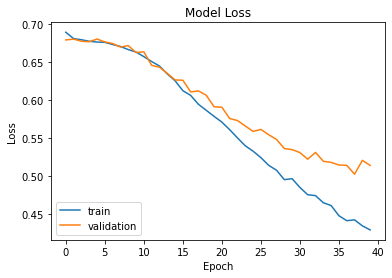

In [76]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

### More Regularization Required...

In [77]:
img_1 = X_train[0]
sample = img_to_array(img_1)
sample.shape

(32, 32, 1)

In [78]:
sample = np.expand_dims(sample, 0)

In [79]:
sample.shape

(1, 32, 32, 1)

In [80]:
data_gen_1 = ImageDataGenerator(width_shift_range=[-2, 2], horizontal_flip=True, rotation_range=90)
it = data_gen_1.flow(sample, batch_size=6)
#Too much data... Too much regularization... So no data augmentation. Let's regularize through hyperparameter tuning

1 (1, 32, 32, 1)
1 (1, 32, 32, 1)
1 (1, 32, 32, 1)
1 (1, 32, 32, 1)
1 (1, 32, 32, 1)
1 (1, 32, 32, 1)
1 (1, 32, 32, 1)
1 (1, 32, 32, 1)
1 (1, 32, 32, 1)


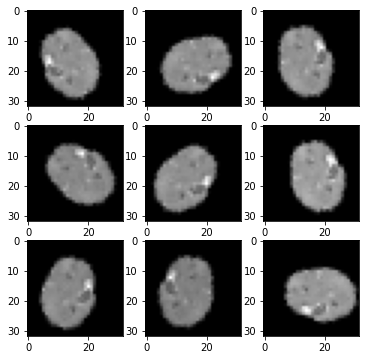

In [81]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(330+1+i)
    batch = it.next()
    print(len(batch), batch.shape)
    image = batch[0].astype('float32')
    plt.imshow(image)

In [82]:
#hist_2 = model_1.fit(data_gen_1.flow(X_train, y_train, batch_size=6, seed=42, shuffle=False), epochs=n_epochs, 
                     #steps_per_epoch=X_train.shape[0]//32, validation_data=(X_val, y_val), callbacks=[es])
#hist_1 = model_1.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val), callbacks=[es])

In [83]:
#!pip install keras-tuner

In [84]:
print(tf.__version__)

2.5.0


In [85]:
#from keras.regularizers import l2

In [86]:
def my_model(hp):
    #kernel regularizers
    kernels = hp.Choice("l2_kernels", values=[0.01,0.1,0.005,0.05])
    model_2 = Sequential([
        #layer1
        Conv2D(filters=hp.Int("conv_layer1_filter", min_value=80, max_value=128, step=5), 
               kernel_size=hp.Choice("conv_layer1_kernelsize", values=[2,4]), strides=hp.Choice("conv_layer1_stride", values=[1,2,3]),
               activation="relu", input_shape=train_shape,
              kernel_regularizer=l2(kernels)),
        MaxPool2D(pool_size=2),
        
        #layer2
        Conv2D(filters=hp.Int("conv_layer2_filter", min_value=64, max_value=128, step=5),
               kernel_size=hp.Choice("conv_layer2_kernelsize", values=[2,4]), activation="relu"),
        MaxPool2D(pool_size=1),
        
        #layer3
        Conv2D(filters=hp.Int("conv_layer3_filter", min_value=64, max_value=136, step=5), kernel_size=2, activation="relu"),
        MaxPool2D(pool_size=1),
        
        Dropout(hp.Float("dropout_layer", min_value=0.1, max_value=0.5, step=5)),
        
        #FCN
        Flatten(),
        Dense(units=hp.Int("dense_layer1_units1", min_value=66, max_value=156, step=5), activation="relu"),
        Dense(units=hp.Int("dense_layer1_units2", min_value=50, max_value=156, step=5), activation="relu"),
        Dense(units=n_classes, activation="softmax")
    ])
    model_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[roc_auc])
    model_2.summary()
    return model_2

In [87]:
from keras_tuner import RandomSearch
from keras_tuner import Objective

tuner = RandomSearch(my_model, objective=Objective("val_roc_auc", direction="max"), max_trials=10, overwrite=True)
tuner.search(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val))

Trial 10 Complete [00h 04m 42s]
val_roc_auc: 0.8225233554840088

Best val_roc_auc So Far: 0.8836789727210999
Total elapsed time: 00h 55m 33s
INFO:tensorflow:Oracle triggered exit


In [88]:
def my_model_2(hp):
    #kernel regularizers
    kernels = hp.Choice("l2_kernels_2", values=[0.0,0.01,0.001,0.1,0.005,0.05])
    model_3 = Sequential([
        #layer1
        Conv2D(filters=hp.Int("conv_layer1_filter_2", min_value=32, max_value=128, step=5), 
               kernel_size=hp.Choice("conv_layer1_kernelsize_2", values=[2,4]), activation="relu", input_shape=train_shape,
              kernel_regularizer=l2(kernels)),
        MaxPool2D(pool_size=2),
        
        #layer2
        Conv2D(filters=hp.Int("conv_layer2_filter_2", min_value=32, max_value=128, step=5),
               kernel_size=hp.Choice("conv_layer2_kernelsize_2", values=[2,4]), activation="relu"),
        MaxPool2D(pool_size=2),
        
        #layer3
        #Conv2D(filters=hp.Int("conv_layer3_filter_2", min_value=32, max_value=128, step=5), kernel_size=2, activation="relu"),
        #MaxPool2D(pool_size=2),
        
        Dropout(hp.Float("dropout_layer_2", min_value=0.0, max_value=0.5, step=5)),
        
        #FCN
        Flatten(),
        Dense(units=hp.Int("dense_layer1_units1_2", min_value=32, max_value=128, step=5), activation="relu"),
        Dense(units=hp.Int("dense_layer1_units2_2", min_value=32, max_value=128, step=5), activation="relu"),
        Dense(units=n_classes, activation="softmax")
    ])
    model_3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[roc_auc])
    model_3.summary()
    return model_3

In [89]:
from keras_tuner import BayesianOptimization
from keras_tuner import Objective

tuner_2 = BayesianOptimization(my_model_2, objective=Objective("val_loss", direction="min"), max_trials=10, overwrite=True)
tuner_2.search(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val))

Trial 10 Complete [00h 06m 26s]
val_loss: 0.5596829652786255

Best val_loss So Far: 0.5237863659858704
Total elapsed time: 01h 06m 38s
INFO:tensorflow:Oracle triggered exit


In [90]:
best_hp = tuner_2.get_best_hyperparameters()[0]
best_model_1 = my_model_2(best_hp)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 127)       2159      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 127)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 127)       258191    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 127)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 127)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3175)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 127)              

In [91]:
hist_2 = best_model_1.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/40
405/405 [==============================] - 10s 25ms/step - loss: 0.6923 - roc_auc: 0.6230 - val_loss: 0.6801 - val_roc_auc: 0.5971
Epoch 2/40
405/405 [==============================] - 10s 24ms/step - loss: 0.6810 - roc_auc: 0.5914 - val_loss: 0.6793 - val_roc_auc: 0.5972
Epoch 3/40
405/405 [==============================] - 9s 23ms/step - loss: 0.6798 - roc_auc: 0.5960 - val_loss: 0.6791 - val_roc_auc: 0.5985s: 0.6792 - roc_auc - ETA: 1s - loss: 0.6782 - roc_auc: 0.600 - ETA: 1s - l
Epoch 4/40
405/405 [==============================] - 9s 23ms/step - loss: 0.6789 - roc_auc: 0.5974 - val_loss: 0.6770 - val_roc_auc: 0.6062- loss: 0.6786 - roc_auc: 0 - ETA: 6s - loss
Epoch 5/40
405/405 [==============================] - 9s 23ms/step - loss: 0.6772 - roc_auc: 0.6033 - val_loss: 0.6820 - val_roc_auc: 0.5938loss: 0.6778 - roc_auc: 0.
Epoch 6/40
405/405 [==============================] - 9s 23ms/step - loss: 0.6764 - roc_auc: 0.6073 - val_loss: 0.6783 - val_roc_auc: 0.6000
Epoch 7

In [223]:
y_pred = best_model_1.predict(X_val)

predictions = np.argmax(y_pred, axis=1)

result = pd.DataFrame(val_ids)
result[1] = predictions

result.columns = ["BraTS21ID", "MGMT_value"]
result2_model_3 = result.groupby("BraTS21ID", as_index=False).mean()
#train_df.BraTS21ID = pd.to_numeric(train_df.BraTS21ID)

result2_model_3 = result.merge(train_df, on="BraTS21ID")
auc_model_3 = roc_auc_score(result2_model_3.MGMT_value_y, result2_model_3.MGMT_value_x)
print(f"Validation AUC={auc_model_3}")
#result2.MGMT_value_y, result2.MGMT_value_x

Validation AUC=0.71420786577415


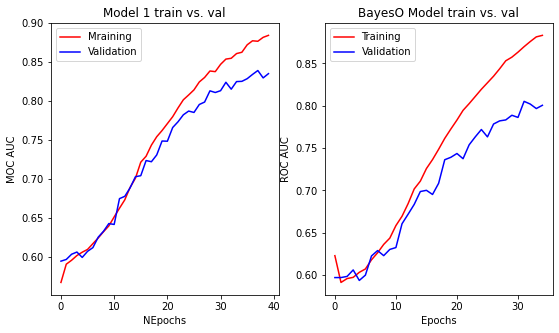

In [93]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.plot(hist_1.history['roc_auc'], 'r-')
plt.plot(hist_1.history['val_roc_auc'], 'b-')
plt.title('Model 1 train vs. val')
plt.ylabel('MOC AUC')
plt.xlabel('NEpochs')
plt.legend(["Mraining", "Validation"], loc="upper left")

plt.subplot(1,2,2)
plt.plot(hist_2.history['roc_auc'], 'r-')
plt.plot(hist_2.history['val_roc_auc'], 'b-')
plt.title('BayesO Model train vs. val')
plt.ylabel('ROC AUC')
plt.xlabel('Epochs')
plt.legend(["Training", "Validation"], loc="upper left")
plt.show()

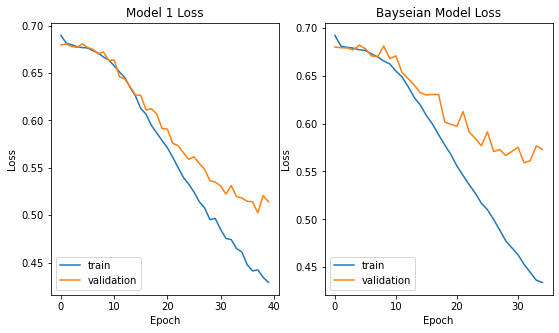

In [94]:
plt.figure(figsize=(9,5))
plt.subplot(121)
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower left')

plt.subplot(122)
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Bayseian Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

In [95]:
best_hp_1 = tuner.get_best_hyperparameters()[0]
best_model_2 = my_model(best_hp_1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 15, 15, 110)       1870      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 110)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 99)          43659     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 99)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 124)         49228     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 124)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 124)        

In [96]:
hist_3 = best_model_2.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/40
405/405 [==============================] - 7s 16ms/step - loss: 0.6879 - roc_auc: 0.6319 - val_loss: 0.6787 - val_roc_auc: 0.5972
Epoch 2/40
405/405 [==============================] - 6s 15ms/step - loss: 0.6805 - roc_auc: 0.5946 - val_loss: 0.6787 - val_roc_auc: 0.6039
Epoch 3/40
405/405 [==============================] - 6s 15ms/step - loss: 0.6783 - roc_auc: 0.6003 - val_loss: 0.6770 - val_roc_auc: 0.6110
Epoch 4/40
405/405 [==============================] - 6s 14ms/step - loss: 0.6756 - roc_auc: 0.6094 - val_loss: 0.6745 - val_roc_auc: 0.6191
Epoch 5/40
405/405 [==============================] - 6s 14ms/step - loss: 0.6725 - roc_auc: 0.6191 - val_loss: 0.6772 - val_roc_auc: 0.6173
Epoch 6/40
405/405 [==============================] - 6s 14ms/step - loss: 0.6677 - roc_auc: 0.6312 - val_loss: 0.6657 - val_roc_auc: 0.6361
Epoch 7/40
405/405 [==============================] - 6s 14ms/step - loss: 0.6572 - roc_auc: 0.6516 - val_loss: 0.6672 - val_roc_auc: 0.6340
Epoch 8/40
40

In [222]:
y_pred = best_model_2.predict(X_val)

predictions = np.argmax(y_pred, axis=1)

result = pd.DataFrame(val_ids)
result[1] = predictions

result.columns = ["BraTS21ID", "MGMT_value"]
result2_model_2 = result.groupby("BraTS21ID", as_index=False).mean()
#train_df.BraTS21ID = pd.to_numeric(train_df.BraTS21ID)

result2_model_2 = result.merge(train_df, on="BraTS21ID")
auc_model_2 = roc_auc_score(result2_model_2.MGMT_value_y, result2_model_2.MGMT_value_x)
print(f"Validation AUC={auc_model_2}")
#result2.MGMT_value_y, result2.MGMT_value_x

Validation AUC=0.8044376610986028


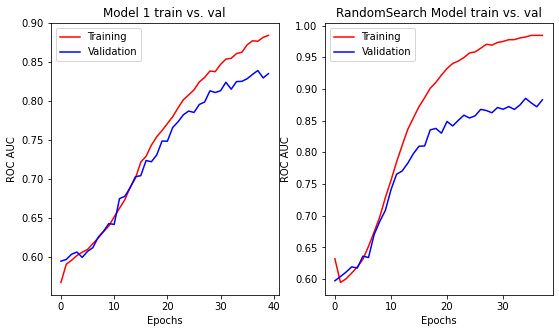

In [98]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.plot(hist_1.history['roc_auc'], 'r-')
plt.plot(hist_1.history['val_roc_auc'], 'b-')
plt.title('Model 1 train vs. val')
plt.ylabel('ROC AUC')
plt.xlabel('Epochs')
plt.legend(["Training", "Validation"], loc="upper left")

plt.subplot(1,2,2)
plt.plot(hist_3.history['roc_auc'], 'r-')
plt.plot(hist_3.history['val_roc_auc'], 'b-')
plt.title('RandomSearch Model train vs. val')
plt.ylabel('ROC AUC')
plt.xlabel('Epochs')
plt.legend(["Training", "Validation"], loc="upper left")
plt.show()

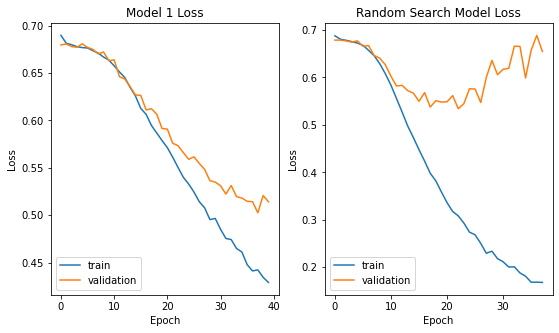

In [99]:
plt.figure(figsize=(9,5))
plt.subplot(121)
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower left')

plt.subplot(122)
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Random Search Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

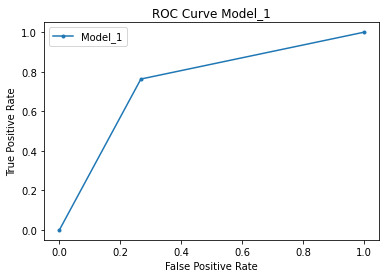

In [117]:
from sklearn.metrics import roc_curve
fpr_model_1, tpr_model_1, f1_model_1 = roc_curve(result2.MGMT_value_y, result2.MGMT_value_x)

plt.plot(fpr_model_1, tpr_model_1, marker=".", label="Model_1")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Model_1")
plt.legend()
plt.show()

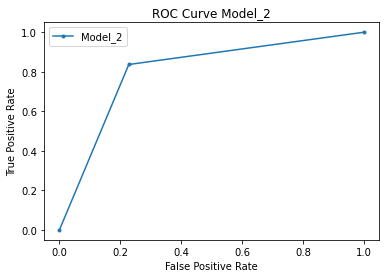

In [118]:
fpr_model_2, tpr_model_2, f1_model_2 = roc_curve(result2_model_2.MGMT_value_y, result2_model_2.MGMT_value_x)

plt.plot(fpr_model_2, tpr_model_2, marker=".", label="Model_2")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Model_2")
plt.legend()
plt.show()

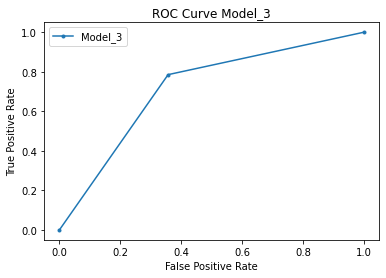

In [121]:
fpr_model_3, tpr_model_3, f1_model_3 = roc_curve(result2_model_3.MGMT_value_y, result2_model_3.MGMT_value_x)

plt.plot(fpr_model_3, tpr_model_3, marker=".", label="Model_3")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Model_3")
plt.legend()
plt.show()

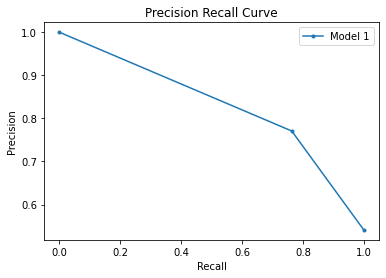

In [124]:
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc

precision_mod_1, recall_mod_1, _ = precision_recall_curve(result2.MGMT_value_y, result2.MGMT_value_x)
plt.plot(recall_mod_1, precision_mod_1, marker=".", label="Model 1")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.legend()
plt.show()

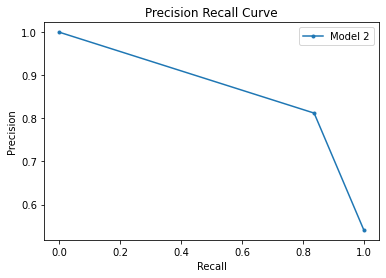

In [127]:
precision_mod_2, recall_mod_2, _ = precision_recall_curve(result2_model_2.MGMT_value_y, result2_model_2.MGMT_value_x)
plt.plot(recall_mod_2, precision_mod_2, marker=".", label="Model 2")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.legend()
plt.show()

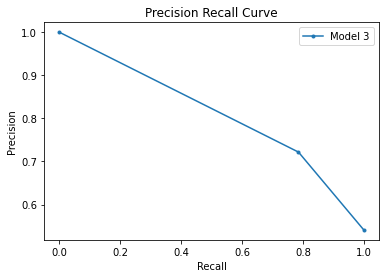

In [128]:
precision_mod_3, recall_mod_3, _ = precision_recall_curve(result2_model_3.MGMT_value_y, result2_model_3.MGMT_value_x)
plt.plot(recall_mod_3, precision_mod_3, marker=".", label="Model 3")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.legend()
plt.show()

# Model 2 is the best!
## Model 1 is good, with excellent generalization!

In [131]:
from tensorflow.keras.models import load_model

#best_model_2.save("Model_2.h5")
#model_1.save("Model_1.h5")

In [135]:
X_test, testidt = load_onto_test('T1wCE', img_size=32)

In [141]:
X_test = np.expand_dims(X_test, -1)

In [144]:
final_y_pred = best_model_2.predict(X_test)
final_predictions = np.argmax(final_y_pred, axis=1)
final_result = pd.DataFrame(testidt)
final_result[1] = final_predictions
final_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [143]:
X_test.shape

(2417, 32, 32, 1)

In [2]:
one = 0
zero = 0
for i in final_predictions:
    if i == 0:
        zero += 1
    else:
        one += 1
print("1s: ", one)
print("0s: ", zero)

NameError: name 'final_predictions' is not defined

In [206]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_roc_auc', direction='max')
Trial summary
Hyperparameters:
l2_kernels: 0.01
conv_layer1_filter: 110
conv_layer1_kernelsize: 4
conv_layer1_stride: 2
conv_layer2_filter: 99
conv_layer2_kernelsize: 2
conv_layer3_filter: 124
dropout_layer: 0.1
dense_layer1_units1: 146
dense_layer1_units2: 95
Score: 0.8836789727210999
Trial summary
Hyperparameters:
l2_kernels: 0.005
conv_layer1_filter: 100
conv_layer1_kernelsize: 4
conv_layer1_stride: 1
conv_layer2_filter: 79
conv_layer2_kernelsize: 4
conv_layer3_filter: 124
dropout_layer: 0.1
dense_layer1_units1: 81
dense_layer1_units2: 105
Score: 0.8798424005508423
Trial summary
Hyperparameters:
l2_kernels: 0.005
conv_layer1_filter: 120
conv_layer1_kernelsize: 4
conv_layer1_stride: 1
conv_layer2_filter: 69
conv_layer2_kernelsize: 4
conv_layer3_filter: 129
dropout_layer: 0.1
dense_layer1_units1: 76
dense_layer1_units2: 145
Score: 0.8770228624343872
Trial summary
Hyperpa

Hyperparameters:
l2_kernels: 0.01
conv_layer1_filter: 110
conv_layer1_kernelsize: 4
conv_layer1_stride: 2
conv_layer2_filter: 99
conv_layer2_kernelsize: 2
conv_layer3_filter: 124
dropout_layer: 0.1
dense_layer1_units1: 146
dense_layer1_units2: 95
Score: 0.8836789727210999

In [217]:
leNet = Sequential()
leNet.add(Conv2D(filters=6, kernel_size=5, strides=1, activation="tanh", kernel_initializer="he_normal", 
                 input_shape=train_shape))
leNet.add(AvgPool2D(pool_size=2, strides=2))
leNet.add(Activation(activation="tanh"))

leNet.add(Conv2D(filters=16, kernel_size=5, strides=1, kernel_initializer="he_normal", activation="tanh"))
leNet.add(AvgPool2D(pool_size=2, strides=2))
leNet.add(Activation(activation="tanh"))

leNet.add(Conv2D(filters=120, kernel_size=5, strides=1, activation="tanh"))

leNet.add(Flatten())
leNet.add(Dense(units=84, kernel_initializer="he_normal", activation="tanh"))
leNet.add(Dense(units=n_classes, kernel_initializer="he_normal", activation="softmax"))

In [218]:
roc_auc = AUC(name="roc_auc", curve="ROC")
#lr_schedule = ExponentialDecay(eta, decay_steps=100000, decay_rate=0.96, staircase=True)

leNet.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[roc_auc])
leNet.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_7 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 1, 1, 120)       

In [219]:
#es = EarlyStopping(monitor="val_roc_auc", mode='max', patience=3)
hist_leNet = leNet.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/40
405/405 [==============================] - 5s 12ms/step - loss: 0.6847 - roc_auc: 0.5816 - val_loss: 0.6771 - val_roc_auc: 0.6055
Epoch 2/40
405/405 [==============================] - 4s 9ms/step - loss: 0.6791 - roc_auc: 0.5985 - val_loss: 0.6739 - val_roc_auc: 0.6115
Epoch 3/40
405/405 [==============================] - 3s 8ms/step - loss: 0.6773 - roc_auc: 0.6038 - val_loss: 0.6806 - val_roc_auc: 0.5948
Epoch 4/40
405/405 [==============================] - 3s 8ms/step - loss: 0.6756 - roc_auc: 0.6090 - val_loss: 0.6694 - val_roc_auc: 0.6212
Epoch 5/40
405/405 [==============================] - 3s 8ms/step - loss: 0.6726 - roc_auc: 0.6160 - val_loss: 0.6719 - val_roc_auc: 0.6221
Epoch 6/40
405/405 [==============================] - 3s 8ms/step - loss: 0.6697 - roc_auc: 0.6241 - val_loss: 0.6679 - val_roc_auc: 0.6267
Epoch 7/40
405/405 [==============================] - 4s 9ms/step - loss: 0.6646 - roc_auc: 0.6359 - val_loss: 0.6610 - val_roc_auc: 0.6454
Epoch 8/40
405/405 

In [1]:
y_pred = leNet.predict(X_val)

predictions = np.argmax(y_pred, axis=1)

result = pd.DataFrame(val_ids)
result[1] = predictions

result.columns = ["BraTS21ID", "MGMT_value"]
result2_leNet = result.groupby("BraTS21ID", as_index=False).mean()
#train_df.BraTS21ID = pd.to_numeric(train_df.BraTS21ID)

result2_leNet = result.merge(train_df, on="BraTS21ID")
auc_leNet = roc_auc_score(result2_leNet.MGMT_value_y, result2_leNet.MGMT_value_x)
print(f"Validation AUC={auc_leNet}")

NameError: name 'leNet' is not defined

In [233]:
model_4 = Sequential()
#model_1.add(Rescaling(scale=1./255))
model_4.add(Conv2D(filters=110, kernel_size=4,strides=2, activation="relu", kernel_regularizer=l2(0.03), input_shape=train_shape))
model_4.add(MaxPool2D(pool_size=2))
#model_1.add(BatchNormalization())

model_4.add(Conv2D(filters=99, kernel_size=2, activation="relu"))
model_4.add(MaxPool2D(pool_size=1))
#model_1.add(BatchNormalization())

#model_1.add(Conv3D(filters=128, kernel_size=3, activation="relu", kernel_initializer="glorot_uniform", padding="same"))
#model_1.add(MaxPooling3D(pool_size=2))
#model_1.add(BatchNormalization())

#model_1.add(Conv2D(filters=90, kernel_size=2, activation="relu"))
#model_1.add(MaxPool2D(pool_size=1))

model_4.add(Conv2D(filters=124, kernel_size=2, activation="relu"))
model_4.add(MaxPool2D(pool_size=1))
#model_1.add(BatchNormalization())

model_4.add(Dropout(0.2))

model_4.add(Flatten())
model_4.add(Dense(units=146, activation="relu"))
model_4.add(Dense(units=95, activation="relu"))

model_4.add(Dense(units=n_classes, activation="softmax"))

In [242]:
roc_auc = AUC(name="roc_auc", curve="ROC")
#lr_schedule = ExponentialDecay(eta, decay_steps=100000, decay_rate=0.96, staircase=True)

model_4.compile(optimizer=Adam(learning_rate=0.0003), loss="categorical_crossentropy", metrics=[roc_auc])
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 15, 15, 110)       1870      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 7, 7, 110)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 6, 6, 99)          43659     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 6, 6, 99)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 5, 5, 124)         49228     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 5, 124)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 124)       

In [243]:
es = EarlyStopping(monitor="val_roc_auc", mode='max', patience=4)
hist_4 = model_4.fit(X_train, y_train, batch_size=30, epochs=35, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/35
432/432 [==============================] - 7s 15ms/step - loss: 0.5435 - roc_auc: 0.8046 - val_loss: 0.5861 - val_roc_auc: 0.7661
Epoch 2/35
432/432 [==============================] - 6s 15ms/step - loss: 0.5260 - roc_auc: 0.8205 - val_loss: 0.5836 - val_roc_auc: 0.7691
Epoch 3/35
432/432 [==============================] - 7s 15ms/step - loss: 0.5125 - roc_auc: 0.8333 - val_loss: 0.5618 - val_roc_auc: 0.7883
Epoch 4/35
432/432 [==============================] - 6s 15ms/step - loss: 0.5031 - roc_auc: 0.8399 - val_loss: 0.5589 - val_roc_auc: 0.7935
Epoch 5/35
432/432 [==============================] - 6s 14ms/step - loss: 0.4894 - roc_auc: 0.8509 - val_loss: 0.5426 - val_roc_auc: 0.8092
Epoch 6/35
432/432 [==============================] - 6s 14ms/step - loss: 0.4742 - roc_auc: 0.8625 - val_loss: 0.5396 - val_roc_auc: 0.8121 - roc_
Epoch 7/35
432/432 [==============================] - 6s 14ms/step - loss: 0.4543 - roc_auc: 0.8761 - val_loss: 0.5320 - val_roc_auc: 0.8244
Epoch 

In [244]:
y_pred = model_4.predict(X_val)

predictions = np.argmax(y_pred, axis=1)

result = pd.DataFrame(val_ids)
result[1] = predictions

result.columns = ["BraTS21ID", "MGMT_value"]
result2_model_4 = result.groupby("BraTS21ID", as_index=False).mean()
#train_df.BraTS21ID = pd.to_numeric(train_df.BraTS21ID)

result2_model_4 = result.merge(train_df, on="BraTS21ID")
auc_model_4 = roc_auc_score(result2_model_4.MGMT_value_y, result2_model_4.MGMT_value_x)
print(f"Validation AUC={auc_model_4}")
#result2.MGMT_value_y, result2.MGMT_value_x

Validation AUC=0.8273978204718513


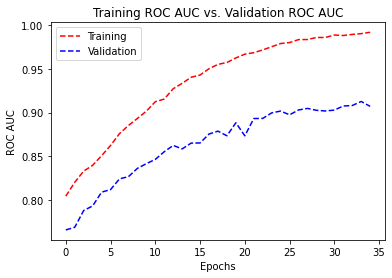

In [245]:
plt.plot(hist_4.history['roc_auc'], 'r--')
plt.plot(hist_4.history['val_roc_auc'], 'b--')
plt.title('Training ROC AUC vs. Validation ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Epochs')
plt.legend(["Training", "Validation"], loc="upper left")
plt.show()

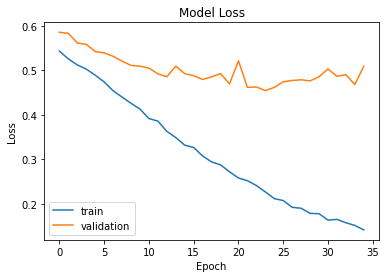

In [246]:
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

In [247]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc

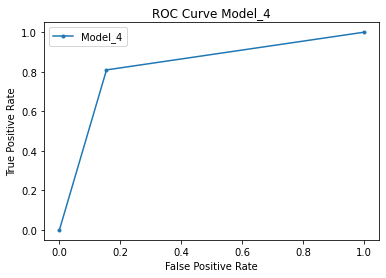

In [248]:
fpr_model_4, tpr_model_4, f1_model_4 = roc_curve(result2_model_4.MGMT_value_y, result2_model_4.MGMT_value_x)

plt.plot(fpr_model_4, tpr_model_4, marker=".", label="Model_4")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Model_4")
plt.legend()
plt.show()

In [249]:
fpr_model_4, tpr_model_4

(array([0.        , 0.15467384, 1.        ]),
 array([0.        , 0.80946948, 1.        ]))

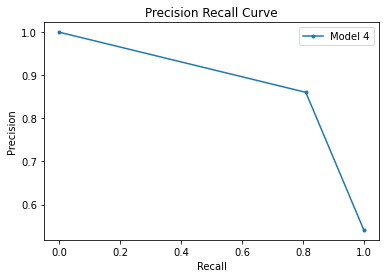

In [250]:
precision_mod_4, recall_mod_4, _ = precision_recall_curve(result2_model_4.MGMT_value_y, result2_model_4.MGMT_value_x)
plt.plot(recall_mod_4, precision_mod_4, marker=".", label="Model 4")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.legend()
plt.show()

In [251]:
precision_mod_4, recall_mod_4

(array([0.54104938, 0.86052153, 1.        ]),
 array([1.        , 0.80946948, 0.        ]))